In [1]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Excel File

In [3]:
#Reading the Dataset
xls = pd.ExcelFile("HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')

## Question 1. Calculate the time spent in ED Department for each visit.

In [4]:
df_EDV['time spent'] = df_EDV['EDDischargeTime'] - df_EDV['VisitDate']
# Print the result
df_EDV[['PatientID', 'time spent']]

,PatientID,time spent
0,1,0 days 11:20:22.924000
1,12,0 days 23:14:20.215000
2,13,0 days 01:50:56.151000
3,14,0 days 01:20:09.793000
4,15,0 days 02:38:20.043000
...,...,...
1194,929,0 days 15:53:09.453000
1195,932,0 days 22:27:04.030000
1196,933,0 days 04:30:03.545000
1197,934,0 days 06:10:35.054000


## Question 2. Get the  number of patients based on service and primary diagnosis.

In [5]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')
#checking the count of patients based on service and primary diagnosis
dfs = df_RE.groupby(['Service','PrimaryDiagnosis'])['AdmissionID'].count()
# to show
print(dfs)

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

## Question 3. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

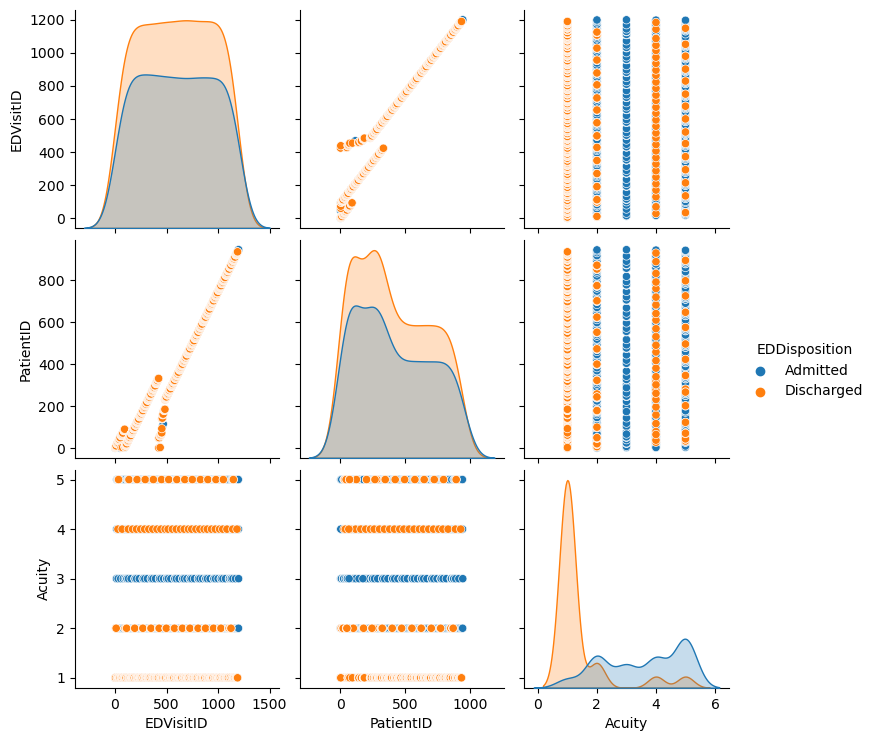

In [6]:
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
# creating a pairplot
sns.pairplot(df_EDV, hue ='EDDisposition')
# to show
plt.show()

## Question 4. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)

## Question 5. Create a bar chart between expectedLOS & Primary diagnosis.

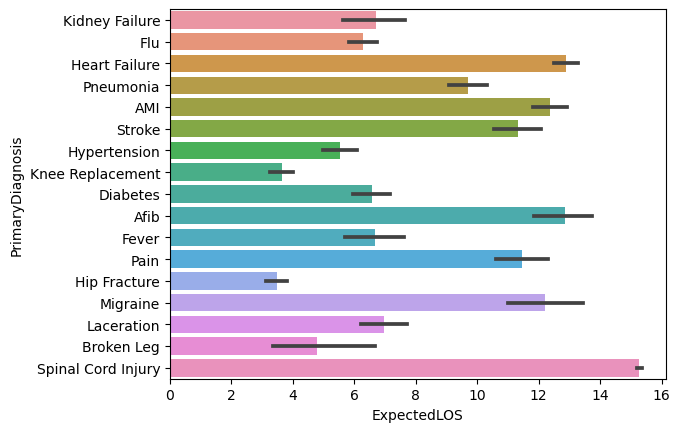

In [7]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')
# creating bar chart
sns.barplot(x = 'ExpectedLOS',y = 'PrimaryDiagnosis',data = df_RE)
# to show
plt.show()

## Question 6. Find the last name of the patients, by getting the first name from the user.

In [8]:
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
# taking the name of the patients as input
firstName = input('What is your first name?\n')
# to find the last names from the given first name
df_PA[df_PA.FirstName == firstName]['LastName'].tolist()

What is your first name?
Ted


['Scott', 'Stanley', 'Hue']

## Question 7. Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [9]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Validating the correct input fron user
while True:
    val = input("Enter Expected LOS: ")
    try:
        val = float(val)
    except:
        print('Please use the valid numeric numbers.')
        continue
    if val < 0:
        print('Please enter a positive number.')
        continue
    break


temp_df = df_D.loc[(df_D['ExpectedLOS']> float(val))] 
# printing the output
print("%s%s" % ('List Of Patients whose ExpectedLOS is greater than ' +str(val)+' day(s) is  : ',  len(temp_df.index)))

Enter Expected LOS: 28
List Of Patients whose ExpectedLOS is greater than 28.0 day(s) is  : 0


## Question 8. Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.

## Question 9. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

## Question 10. Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

## Question 11. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [10]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

# Create a new dataframe with the discharge time as values
discharge_data = pd.DataFrame(df_RE['DischargeDate'])

# Extract the date and time from the discharge time and create separate columns for them
discharge_data['Date'] = discharge_data['DischargeDate'].dt.date
discharge_data['Time'] = discharge_data['DischargeDate'].dt.time

# Print the result
print(discharge_data[['Date', 'Time']])


           Date             Time
0    2018-01-04  19:59:31.391000
1    2018-01-04  21:28:51.898000
2    2018-01-04  22:28:23.672000
3    2018-01-05  05:47:04.933000
4    2018-01-05  14:18:30.029000
..          ...              ...
715  2018-03-07  21:22:10.061000
716  2018-03-08  02:43:18.749000
717  2018-03-08  09:27:18.377000
718  2018-03-10  06:06:12.068000
719  2018-03-10  20:38:30.568000

[720 rows x 2 columns]


## Question 12. Create a visualization on the count of patients based on primary diagnosis.

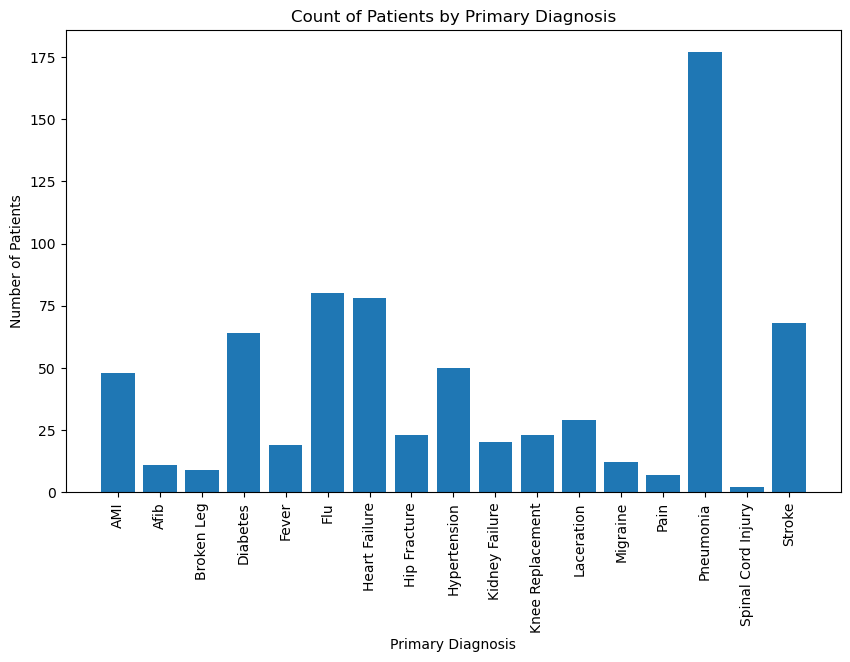

In [18]:
diagnosis_counts = df_RE.groupby('PrimaryDiagnosis')['PatientID'].count()

# Create a bar plot of the diagnosis counts
plt.figure(figsize=(10, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Primary Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Count of Patients by Primary Diagnosis')
plt.show()

## Question 13. Create a bar chart on service & expected length of stay.

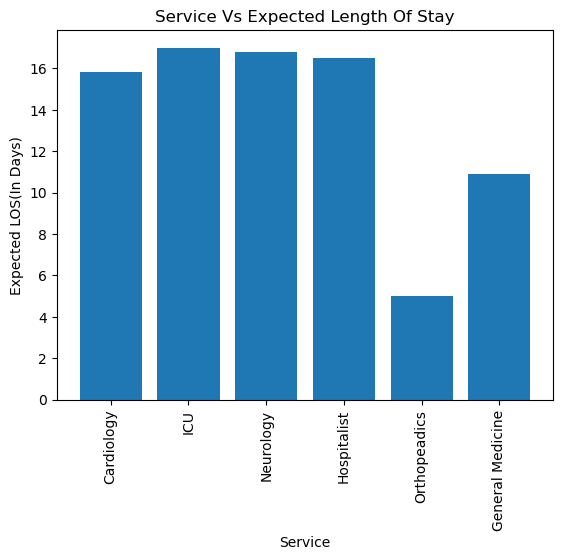

In [25]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')


plt.bar(df_D['Service'], df_D['ExpectedLOS'])
plt.title('Service Vs Expected Length Of Stay')
plt.xlabel('Service')
plt.xticks(rotation=90)
plt.ylabel('Expected LOS(In Days)')

plt.show()

## Question 14. Find the count of Spanish Speaking patients.

In [29]:
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

# Filter the data to include only Spanish speaking patients
spanish_speaking = df_PA.loc[df_PA['Language'] == 'Spanish']

# Get the count of Spanish speaking patients
count_spanish_speaking = spanish_speaking['PatientID'].nunique()

# Print the result
print('Number of Spanish speaking patients:', count_spanish_speaking)


Number of Spanish speaking patients: 110


## Question 15. Create a boxplot on ExpectedLOS by taking service into account.

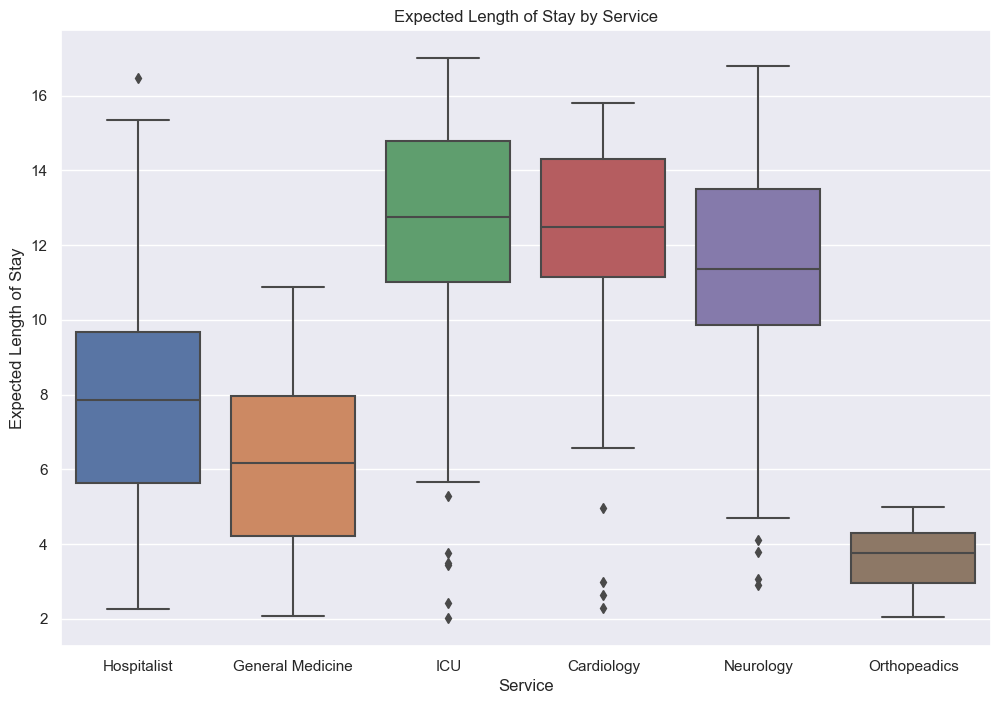

In [31]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

# Create a boxplot of ExpectedLOS by Service
sns.boxplot(x='Service', y='ExpectedLOS', data=df_RE)
sns.set(rc={'figure.figsize':(8,8)})
plt.title('Expected Length of Stay by Service')
plt.xlabel('Service')
plt.ylabel('Expected Length of Stay')
plt.show()

## Question 16. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

## Question 17. Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)

## Question 18. Display using a donut chart the patient count in the ReAdmissionRegistry.

In [34]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

